# Análisis Exploratorio de Datos

Se importa las librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns

Se crea un DataFrame con los datos de la Categoría Gasto Salud

In [2]:
df = pd.read_csv('../Data/data_gasto_salud.csv')

Un .info() para tener idea de cuantas columnas y que tipo de datos hay en cada una de ellas, y si tenemos datos Nan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   país            132 non-null    object 
 1   codigo_pais     132 non-null    object 
 2   factor_(serie)  132 non-null    object 
 3   codigo_serie    132 non-null    object 
 4   1987            0 non-null      float64
 5   1988            0 non-null      float64
 6   1989            0 non-null      float64
 7   1990            0 non-null      float64
 8   1991            0 non-null      float64
 9   1992            0 non-null      float64
 10  1993            0 non-null      float64
 11  1994            0 non-null      float64
 12  1995            0 non-null      float64
 13  1996            0 non-null      float64
 14  1997            0 non-null      float64
 15  1998            0 non-null      float64
 16  1999            0 non-null      float64
 17  2000            129 non-null    flo

In [4]:
df.head()

país codigo_pais                                     factor_(serie)  \
0  Afganistán         AFG  Gasto nacional en salud del gobierno general p...   
1  Afganistán         AFG        Gasto de bolsillo per cápita (US$ actuales)   
2  Afganistán         AFG  Gasto interno privado en salud per cápita (US$...   
3    Alemania         DEU  Gasto nacional en salud del gobierno general p...   
4    Alemania         DEU        Gasto de bolsillo per cápita (US$ actuales)   

        codigo_serie  1987  1988  1989  1990  1991  1992  ...       2013  \
0  SH.XPD.GHED.PC.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...     2.8348   
1  SH.XPD.OOPC.PC.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...    40.5669   
2  SH.XPD.PVTD.PC.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...    40.5669   
3  SH.XPD.GHED.PC.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...  3897.2982   
4  SH.XPD.OOPC.PC.CD   NaN   NaN   NaN   NaN   NaN   NaN  ...   679.1858   

        2014       2015       2016       2017       2018       2019  \
0     2.9856     3.1064     3.1222     3.4096     2.7733     2.4879   
1    43.9721    47.0753    46.7139    50.5048    54.3732    57.0254   
2    43.9721    47.0753    46.7139    50.5058    54.4835    57.0254   
3  4087.5269  3559.0362  3665.8242  3929.0932  4251.8416  4227.0487   
4   690.4245   605.2361   614.9713   655.0565   726.2255   738.2104   

        2020     2021  2022  
0     6.1311   2.6858   NaN  
1    60.0667  62.7903   NaN  
2    61.2048  62.9002   NaN  
3  4651.7547      NaN   NaN  
4   743.7962      NaN   NaN  

[5 rows x 40 columns]

Se utiliza .describe() para obtener una visión general de las estadísticas clave de las columnas numéricas en tu conjunto de datos

In [5]:
columnas = ['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001','2002', '2003']
descripcion1 = df[columnas].describe().round(2)
descripcion1

1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  1998  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1999     2000     2001     2002     2003  
count   0.0   129.00   129.00   132.00   132.00  
mean    NaN   357.93   365.14   389.44   463.63  
std     NaN   568.99   588.21   654.15   775.74  
min     NaN     1.29     1.57     0.15     1.30  
25%     NaN    16.02    17.20    15.78    16.38  
50%     NaN   145.09   112.10    97.70   101.27  
75%     NaN   419.00   421.42   462.87   531.61  
max     NaN  2542.92  2667.56  3224.19  3852.76

El análisis descriptivo de la serie temporal entre los años 1999 y 2002 revela una variabilidad significativa en los valores de un factor específico. Es crucial destacar que antes del año 2000 no existen datos disponibles para este factor debido a la ausencia de estudios previos. Durante el período analizado, la desviación estándar fluctúa entre 568.99 y 588.21, indicando una considerable dispersión en los datos. Aunque se observa un aumento en el promedio de 357.93 en 1999 a 365.14 en 2002, esta diferencia puede no representar una tendencia clara debido a la influencia de la variabilidad. La distribución de los datos, representada por percentiles, y la presencia de valores extremos (rango de 1.29 a 2667.56), subrayan la complejidad y la falta de una tendencia lineal evidente en estos años específicos.

In [6]:
columnas = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
descripcion2 = df[columnas].describe().round(2)
descripcion2

2004     2005     2006     2007     2008     2009     2010     2011  \
count   132.00   132.00   132.00   132.00   132.00   132.00   132.00   132.00   
mean    524.95   558.95   593.39   669.44   743.45   736.81   774.11   852.59   
std     870.50   917.50   961.27  1082.57  1196.71  1186.26  1234.64  1371.17   
min       1.19     1.34     1.36     1.85     2.45     2.34     2.55     2.94   
25%      19.48    21.56    24.36    27.43    32.48    37.13    36.80    45.96   
50%     119.88   151.91   184.65   212.47   244.96   229.08   262.56   278.48   
75%     609.37   638.61   655.48   757.43   836.15   834.42   811.09   865.94   
max    4231.67  4638.15  4911.31  5771.66  6535.64  6165.49  6655.48  7513.97   

          2012     2013     2014     2015     2016     2017     2018     2019  \
count   132.00   132.00   132.00   132.00   132.00   132.00   132.00   129.00   
mean    847.37   864.34   880.41   797.49   802.51   835.73   870.33   871.74   
std    1357.85  1380.29  1408.80  1275.46  1294.94  1336.06  1405.07  1408.41   
min       2.28     2.83     2.99     3.11     3.12     3.41     2.77     2.49   
25%      43.52    50.02    48.02    48.92    46.64    50.51    56.70    42.07   
50%     279.44   286.89   290.19   260.21   236.08   249.29   256.18   254.07   
75%     843.53   898.38   951.39   881.71   883.89   932.44   933.27   901.84   
max    7602.65  7857.19  7776.92  6469.65  6513.63  6652.85  7089.27  6863.65   

          2020     2021  2022  
count   129.00    12.00   0.0  
mean    914.20  2129.84   NaN  
std    1508.19  2588.21   NaN  
min       5.95     2.69   NaN  
25%      52.75   590.95   NaN  
50%     253.68  1171.75   NaN  
75%     904.10  2296.29   NaN  
max    6643.36  7717.88   NaN

El análisis de la serie temporal entre 2004 y 2022 revela un aumento constante en la cantidad de observaciones hasta 2018, seguido de una abrupta disminución y la ausencia de datos en 2022. La media de los valores muestra una tendencia ascendente de 524.95 en 2004 a 914.20 en 2021, aunque la amplia variabilidad, expresada por una desviación estándar que varía entre 870.50 y 1508.19, indica fluctuaciones notables. El rango extenso, de 1.19 a 7717.88, subraya la diversidad de los datos, y los percentiles detallan la distribución. A pesar de la complejidad y la presencia de valores extremos, el análisis proporciona una visión general de la serie temporal, enfatizando su evolución y reconociendo la falta de datos más recientes.

Para conocer si tenemos valores faltantes en las columnas de ['país'] ['codigo_pais'] ['factor_(serie)'] ['codigo_serie']

In [7]:
print(df['país'].isna().sum())
print(df['codigo_pais'].isna().sum())
print(df['factor_(serie)'].isna().sum())
print(df['codigo_serie'].isna().sum())


0
0
0
0


Veamos en que países se encuentran en estudio.

In [8]:
cantidad_paises = len(df['país'].unique())
print('Cantidad de paises en estudio:',cantidad_paises)
pd.DataFrame(df['país'].unique(), columns=['Países'])

Cantidad de paises en estudio: 44


Países
0                   Afganistán
1                     Alemania
2                      Argelia
3               Arabia Saudita
4                    Argentina
5                    Australia
6                      Austria
7                       Brasil
8                 Burkina Faso
9                        China
10                      Canadá
11                     Camboya
12                        Chad
13                   Dinamarca
14                     Ecuador
15      Emiratos Árabes Unidos
16  Egipto, República Árabe de
17                        Cuba
18                  Costa Rica
19              Estados Unidos
20                      España
21                        Fiji
22                   Finlandia
23         Federación de Rusia
24                      Grecia
25                       India
26                   Marruecos
27                      México
28                       Nepal
29                       Níger
30                Países Bajos
31              Nueva Zelandia
32                 Reino Unido
33                      Rwanda
34                       Samoa
35                Sierra Leona
36                   Sudáfrica
37                    Singapur
38                       Suiza
39                   Venezuela
40                    Colombia
41                       Japón
42                       Kenya
43                     Noruega

In [9]:
df['país'] = df['país'].replace('Egipto, República Árabe de', 'Egipto')
df['país'] = df['país'].replace('Federación de Rusia', 'Rusia')

Veamos Variables se estudia

In [10]:
cantidad_series = len(df['factor_(serie)'].unique())
print('Cantidad de variables estudio:',cantidad_series)
serie_unicos = df['factor_(serie)'].unique()
print(serie_unicos)

Cantidad de variables estudio: 3
['Gasto nacional en salud del gobierno general per cápita (US$ a precios actuales)'
 'Gasto de bolsillo per cápita (US$ actuales)'
 'Gasto interno privado en salud per cápita (US$ a precios actuales)']


Reorganizamos el DataFrame

In [11]:
# Eliminar columnas específicas por nombre
columnas_a_eliminar = ['codigo_pais', 'codigo_serie']  # Lista con los nombres de las columnas a eliminar
df = df.drop(columnas_a_eliminar, axis=1)

In [12]:
# Reorganizar los datos para tener 'factor_(serie)' como índice y los años como valores en una sola columna
df_reorganizado = df.melt(id_vars=['país', 'factor_(serie)'], var_name='Año', value_name='Valor')

# Mostrar el DataFrame reorganizado
df_reorganizado

país                                     factor_(serie)   Año  \
0     Afganistán  Gasto nacional en salud del gobierno general p...  1987   
1     Afganistán        Gasto de bolsillo per cápita (US$ actuales)  1987   
2     Afganistán  Gasto interno privado en salud per cápita (US$...  1987   
3       Alemania  Gasto nacional en salud del gobierno general p...  1987   
4       Alemania        Gasto de bolsillo per cápita (US$ actuales)  1987   
...          ...                                                ...   ...   
4747       Kenya        Gasto de bolsillo per cápita (US$ actuales)  2022   
4748       Kenya  Gasto interno privado en salud per cápita (US$...  2022   
4749     Noruega  Gasto nacional en salud del gobierno general p...  2022   
4750     Noruega        Gasto de bolsillo per cápita (US$ actuales)  2022   
4751     Noruega  Gasto interno privado en salud per cápita (US$...  2022   

      Valor  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
4747    NaN  
4748    NaN  
4749    NaN  
4750    NaN  
4751    NaN  

[4752 rows x 4 columns]

In [13]:
df_reorganizado['Valor'].describe()

count    2772.000000
mean      707.167602
std      1191.467831
min         0.151600
25%        34.365325
50%       216.445800
75%       776.283725
max      7857.194700
Name: Valor, dtype: float64

In [14]:
repetitions = df_reorganizado['factor_(serie)'].value_counts()
print(repetitions)

Gasto nacional en salud del gobierno general per cápita (US$ a precios actuales)    1584
Gasto de bolsillo per cápita (US$ actuales)                                         1584
Gasto interno privado en salud per cápita (US$ a precios actuales)                  1584
Name: factor_(serie), dtype: int64


In [15]:
unique_factors = df_reorganizado['factor_(serie)'].unique()

for factor in unique_factors:
    filtered_data = df_reorganizado[df_reorganizado['factor_(serie)'] == factor]
    description = filtered_data['Valor'].describe()
    print(f"Descripción para el factor '{factor}':\n{description}\n")

Descripción para el factor 'Gasto nacional en salud del gobierno general per cápita (US$ a precios actuales)':
count     924.000000
mean     1206.813711
std      1633.073771
min         0.151600
25%        32.475000
50%       308.707200
75%      2139.792875
max      7857.194700
Name: Valor, dtype: float64

Descripción para el factor 'Gasto de bolsillo per cápita (US$ actuales)':
count     924.000000
mean      326.737588
std       411.552427
min         2.091600
25%        30.725550
50%       150.581900
75%       536.535925
max      2761.979300
Name: Valor, dtype: float64

Descripción para el factor 'Gasto interno privado en salud per cápita (US$ a precios actuales)':
count     924.000000
mean      587.951506
std      1008.230679
min         2.980700
25%        39.668900
50%       213.336400
75%       771.184650
max      6788.904700
Name: Valor, dtype: float64



Ante la presencia significativa de valores faltantes (NaN) en nuestro conjunto de datos, se optó por aplicar una estrategia de imputación. Esta estrategia consiste en el reemplazo de los valores faltantes por la media de los datos, tomando en consideración la especificidad de cada país como también la del factor en estudio. Este enfoque nos permite abordar la ausencia de datos, asegurando una mayor integridad en nuestro conjunto de datos al evitar vacíos o valores faltantes, lo que resulta crucial para un análisis robusto y confiable.

In [16]:
def fill_missing_with_country_factor_mean(df):
    means_by_country_factor = df.groupby(['país', 'factor_(serie)'])['Valor'].transform('mean')
    df['Valor'] = df['Valor'].fillna(means_by_country_factor)
    return df

# Llamada a la función para rellenar los valores faltantes con la media por país y factor
df_filled = fill_missing_with_country_factor_mean(df_reorganizado)

In [17]:
df_filled

país                                     factor_(serie)   Año  \
0     Afganistán  Gasto nacional en salud del gobierno general p...  1987   
1     Afganistán        Gasto de bolsillo per cápita (US$ actuales)  1987   
2     Afganistán  Gasto interno privado en salud per cápita (US$...  1987   
3       Alemania  Gasto nacional en salud del gobierno general p...  1987   
4       Alemania        Gasto de bolsillo per cápita (US$ actuales)  1987   
...          ...                                                ...   ...   
4747       Kenya        Gasto de bolsillo per cápita (US$ actuales)  2022   
4748       Kenya  Gasto interno privado en salud per cápita (US$...  2022   
4749     Noruega  Gasto nacional en salud del gobierno general p...  2022   
4750     Noruega        Gasto de bolsillo per cápita (US$ actuales)  2022   
4751     Noruega  Gasto interno privado en salud per cápita (US$...  2022   

            Valor  
0        2.463610  
1       37.732205  
2       37.800170  
3     3312.234576  
4      581.818381  
...           ...  
4747    16.611381  
4748    22.982057  
4749  5886.812005  
4750  1049.097077  
4751  1070.962068  

[4752 rows x 4 columns]

In [18]:
df_filled['Valor'].describe()

count    4752.000000
mean      700.960040
std      1160.127145
min         0.151600
25%        37.512700
50%       222.148350
75%       759.871775
max      7857.194700
Name: Valor, dtype: float64

In [19]:
df_filled['Valor'].isna().sum()

0

## Observemos la distribución de los factores por cada país a continuación 

In [20]:
# Obtener los factores únicos por país
factores_por_pais = df_filled.groupby(['país'])['factor_(serie)'].unique().apply(list).to_dict()

# Crear una lista con los nombres de los países en el DataFrame
paises = df_filled['país'].unique().tolist()

# Crear un widget de menú desplegable (dropdown) para seleccionar un país
dropdown_paises = widgets.Dropdown(
    options=paises,
    description='Seleccionar país:'
)

# Función para graficar los datos por país seleccionado
def graficar_datos_por_pais(pais):
    
    datos_pais = df_filled[df_filled['país'] == pais]

    fig = go.Figure()
    
    for factor in factores_por_pais[pais]:
        datos_factor = datos_pais[datos_pais['factor_(serie)'] == factor]
        fig.add_trace(go.Scatter(x=datos_factor['Año'], y=datos_factor['Valor'], mode='lines+markers', name=factor))
    
    fig.update_layout(
        title=f'Datos para {pais}',
        xaxis_title='Año',
        yaxis_title='Valor',
        legend=dict(x=0, y=-1.2, orientation='h'),
        height=450,
        width=1200
    )
    fig.show()

# Mostrar un widget vacío para eliminar el gráfico por defecto
display(widgets.Output())

# Interactividad: enlazar el widget de menú desplegable a la función de graficado
widgets.interactive(graficar_datos_por_pais, pais=dropdown_paises)

Output()

interactive(children=(Dropdown(description='Seleccionar país:', options=('Afganistán', 'Alemania', 'Argelia', …

### Seguido de esto, veremos como estan concentrados los datos y si existen valores atipicos (outliers) en nuestro dataset

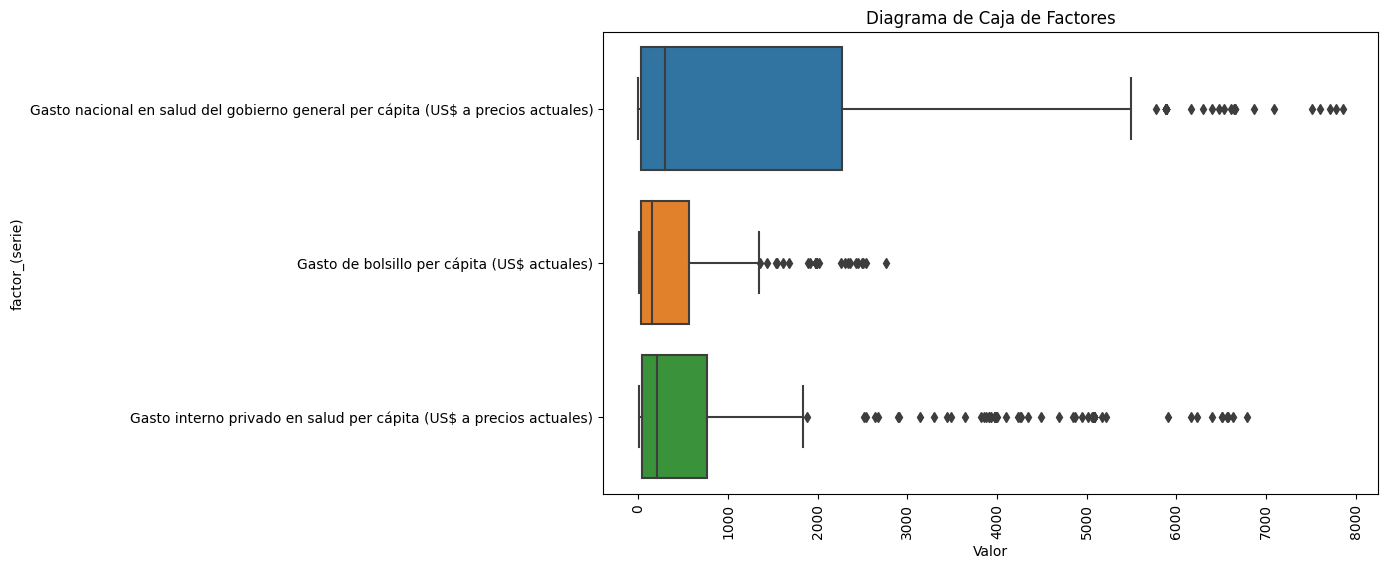

In [21]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot utilizando Seaborn
sns.boxplot(y='factor_(serie)', x='Valor', data=df_filled)
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.title('Diagrama de Caja de Factores')
plt.show()

### A continuación, veremos Top 5 de países por factor

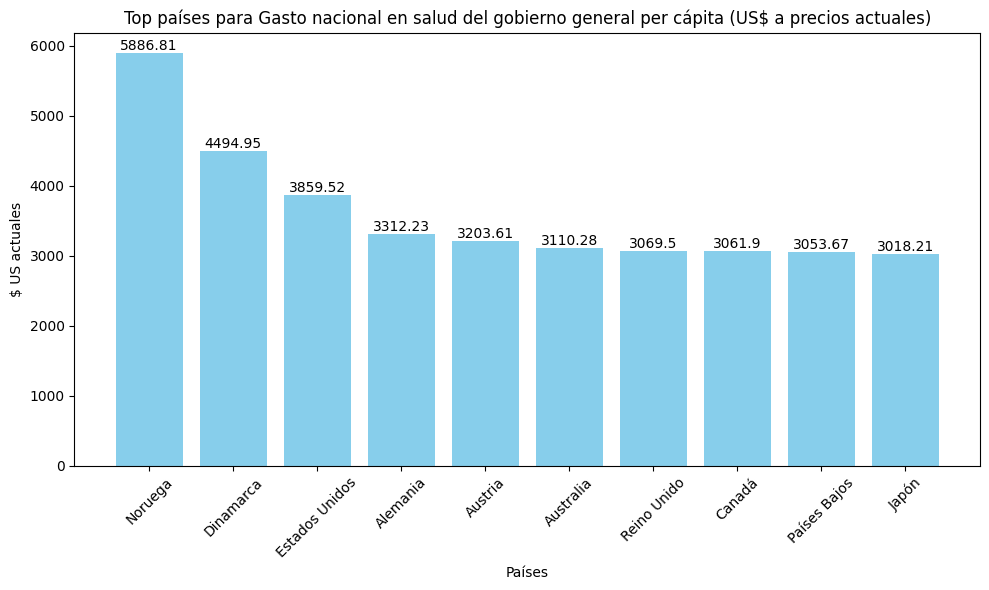

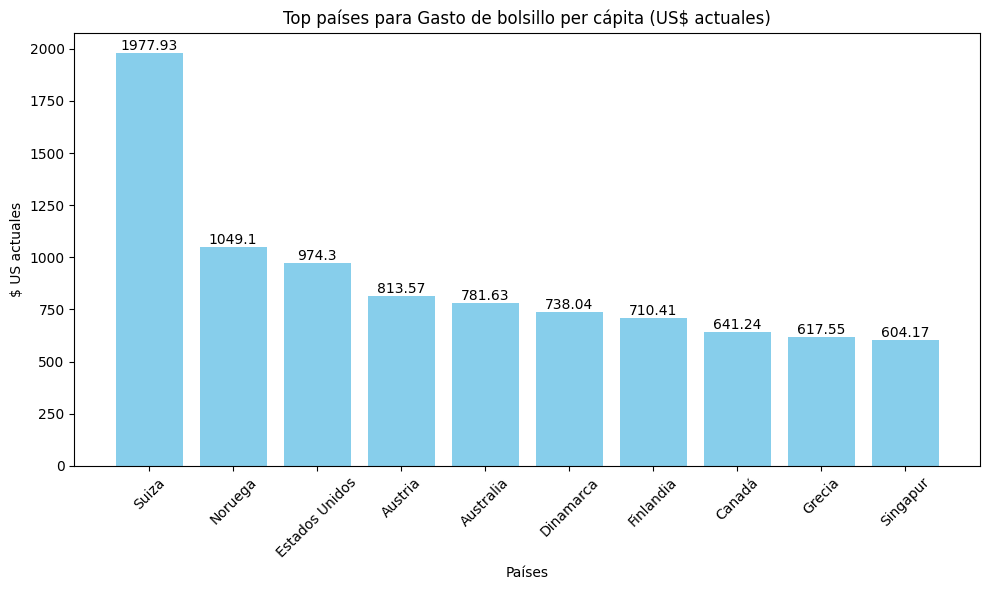

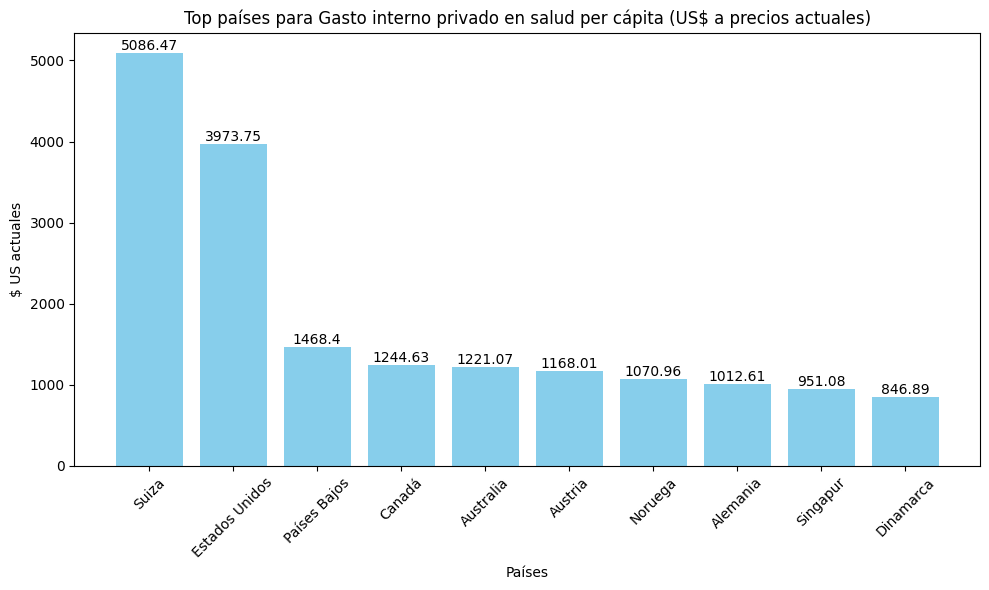

In [22]:
# Encontrar el top 5 de países para cada factor de la serie
factors = df_filled['factor_(serie)'].unique()  # Obtener la lista de factores únicos

for factor in factors:
    # Filtrar el DataFrame por cada factor de la serie
    filtered_df = df_filled[df_filled['factor_(serie)'] == factor]
    
    # Calcular la media de los valores por país en ese factor
    grouped = filtered_df.groupby('país')['Valor'].mean().reset_index()
    
    # Ordenar los valores por el porcentaje en orden descendente
    sorted_df = grouped.sort_values(by='Valor', ascending=False)
    
    # Obtener los top países para cada factor (puede ser menos de 5)
    top_countries = sorted_df.head(10)
    
    # Gráfico de barras para visualizar los top países con etiquetas de valores
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_countries['país'], top_countries['Valor'], color='skyblue')
    plt.title(f'Top países para {factor}')
    plt.xlabel('Países')
    plt.ylabel('$ US actuales')
    plt.xticks(rotation=45)
    
    # Etiquetas de valor en cada barra
    for bar, value in zip(bars, top_countries['Valor']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [23]:
df_filled.to_csv('../Data/data_gasto_salud_c.csv', index=False)